In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)


In [17]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 512),
            nn.ReLU(inplace=True),

            nn.Linear(512, 784),
            nn.Tanh()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, z):
        out = self.net(z)
        return out

In [18]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        out = self.net(x)
        return out

In [19]:
Gen = Generator().to(device)
Disc = Discriminator().to(device)

criterion = nn.BCELoss()


optim_g = optim.Adam(Gen.parameters(), lr=2e-4, betas=(0.5, 0.999))
optim_d = optim.Adam(Disc.parameters(), lr=2e-4, betas=(0.5, 0.999))

fixed_noise = torch.randn(5, 100, device=device)


Epoch [1/20] Batch 0/469 Loss D: 1.3907, Loss G: 0.6932, D(x): 0.4973, D(G(z)): 0.5000
Epoch [1/20] Batch 200/469 Loss D: 0.7468, Loss G: 1.0959, D(x): 0.8608, D(G(z)): 0.3084
Epoch [1/20] Batch 400/469 Loss D: 0.7562, Loss G: 2.2317, D(x): 0.7232, D(G(z)): 0.0847


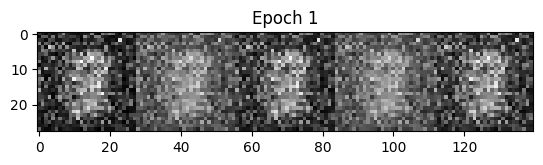

Epoch [2/20] Batch 0/469 Loss D: 0.4906, Loss G: 2.6298, D(x): 0.8421, D(G(z)): 0.0549
Epoch [2/20] Batch 200/469 Loss D: 0.6996, Loss G: 1.6768, D(x): 0.6935, D(G(z)): 0.1612
Epoch [2/20] Batch 400/469 Loss D: 0.6273, Loss G: 4.3210, D(x): 0.8620, D(G(z)): 0.0087


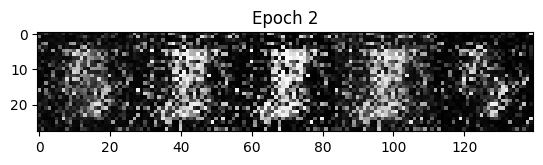

Epoch [3/20] Batch 0/469 Loss D: 0.5434, Loss G: 3.1204, D(x): 0.7607, D(G(z)): 0.0362
Epoch [3/20] Batch 200/469 Loss D: 0.6645, Loss G: 4.3803, D(x): 0.8597, D(G(z)): 0.0089
Epoch [3/20] Batch 400/469 Loss D: 0.5712, Loss G: 3.5042, D(x): 0.7496, D(G(z)): 0.0313


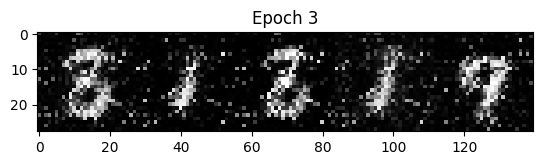

Epoch [4/20] Batch 0/469 Loss D: 0.8863, Loss G: 0.9518, D(x): 0.5531, D(G(z)): 0.3835
Epoch [4/20] Batch 200/469 Loss D: 0.6009, Loss G: 2.3956, D(x): 0.8029, D(G(z)): 0.0857
Epoch [4/20] Batch 400/469 Loss D: 0.6305, Loss G: 1.8951, D(x): 0.7045, D(G(z)): 0.1323


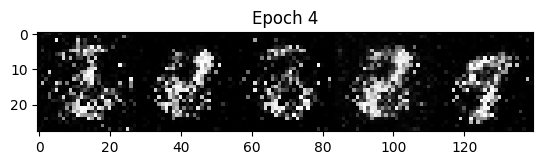

Epoch [5/20] Batch 0/469 Loss D: 0.6138, Loss G: 2.3642, D(x): 0.7402, D(G(z)): 0.0889
Epoch [5/20] Batch 200/469 Loss D: 0.8257, Loss G: 1.5534, D(x): 0.5641, D(G(z)): 0.2044
Epoch [5/20] Batch 400/469 Loss D: 0.7017, Loss G: 3.5211, D(x): 0.7939, D(G(z)): 0.0248


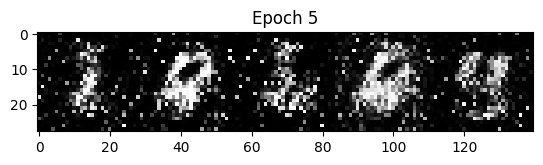

Epoch [6/20] Batch 0/469 Loss D: 0.6126, Loss G: 2.8382, D(x): 0.7320, D(G(z)): 0.0558
Epoch [6/20] Batch 200/469 Loss D: 0.6891, Loss G: 1.5958, D(x): 0.6922, D(G(z)): 0.1922
Epoch [6/20] Batch 400/469 Loss D: 0.8233, Loss G: 5.1064, D(x): 0.8878, D(G(z)): 0.0054


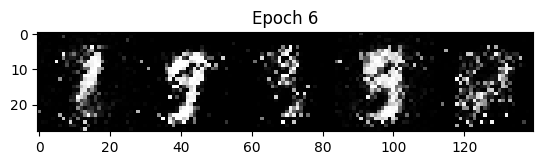

Epoch [7/20] Batch 0/469 Loss D: 0.6741, Loss G: 3.0977, D(x): 0.7860, D(G(z)): 0.0438
Epoch [7/20] Batch 200/469 Loss D: 0.7709, Loss G: 2.9276, D(x): 0.7618, D(G(z)): 0.0475
Epoch [7/20] Batch 400/469 Loss D: 0.8110, Loss G: 1.6717, D(x): 0.6289, D(G(z)): 0.2033


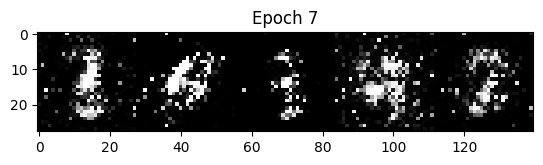

Epoch [8/20] Batch 0/469 Loss D: 0.5297, Loss G: 3.5064, D(x): 0.7321, D(G(z)): 0.0260
Epoch [8/20] Batch 200/469 Loss D: 0.5695, Loss G: 2.5826, D(x): 0.7924, D(G(z)): 0.0726
Epoch [8/20] Batch 400/469 Loss D: 0.7440, Loss G: 2.0169, D(x): 0.6633, D(G(z)): 0.1361


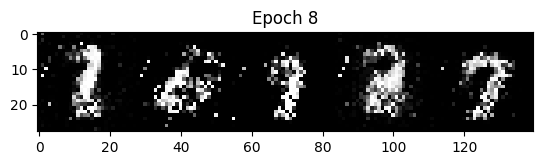

Epoch [9/20] Batch 0/469 Loss D: 0.7348, Loss G: 3.9001, D(x): 0.8239, D(G(z)): 0.0194
Epoch [9/20] Batch 200/469 Loss D: 0.5435, Loss G: 2.7160, D(x): 0.8079, D(G(z)): 0.0653
Epoch [9/20] Batch 400/469 Loss D: 0.6657, Loss G: 2.9940, D(x): 0.8073, D(G(z)): 0.0502


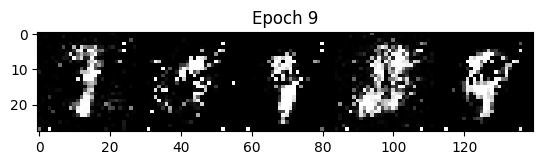

Epoch [10/20] Batch 0/469 Loss D: 0.5943, Loss G: 2.8350, D(x): 0.8047, D(G(z)): 0.0587
Epoch [10/20] Batch 200/469 Loss D: 0.6788, Loss G: 2.3398, D(x): 0.6948, D(G(z)): 0.1023
Epoch [10/20] Batch 400/469 Loss D: 0.7542, Loss G: 1.8472, D(x): 0.6598, D(G(z)): 0.1628


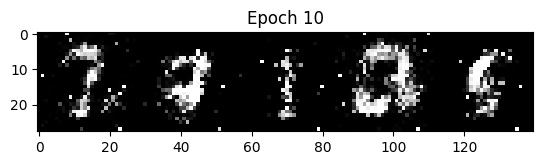

Epoch [11/20] Batch 0/469 Loss D: 0.6955, Loss G: 2.1913, D(x): 0.7770, D(G(z)): 0.1136
Epoch [11/20] Batch 200/469 Loss D: 0.6854, Loss G: 4.1386, D(x): 0.8277, D(G(z)): 0.0148
Epoch [11/20] Batch 400/469 Loss D: 0.7069, Loss G: 1.8400, D(x): 0.7190, D(G(z)): 0.1764


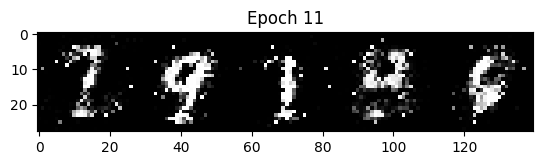

Epoch [12/20] Batch 0/469 Loss D: 0.7568, Loss G: 3.0066, D(x): 0.8242, D(G(z)): 0.0491
Epoch [12/20] Batch 200/469 Loss D: 1.2725, Loss G: 4.2924, D(x): 0.9106, D(G(z)): 0.0146
Epoch [12/20] Batch 400/469 Loss D: 0.7397, Loss G: 1.9691, D(x): 0.7190, D(G(z)): 0.1362


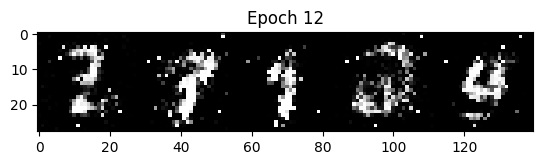

Epoch [13/20] Batch 0/469 Loss D: 0.9546, Loss G: 1.2364, D(x): 0.5281, D(G(z)): 0.3072
Epoch [13/20] Batch 200/469 Loss D: 1.0397, Loss G: 3.5016, D(x): 0.9084, D(G(z)): 0.0340
Epoch [13/20] Batch 400/469 Loss D: 0.8115, Loss G: 1.9138, D(x): 0.7349, D(G(z)): 0.1527


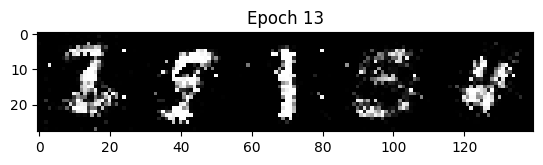

Epoch [14/20] Batch 0/469 Loss D: 0.8783, Loss G: 2.0613, D(x): 0.7154, D(G(z)): 0.1317
Epoch [14/20] Batch 200/469 Loss D: 0.6982, Loss G: 2.4731, D(x): 0.7331, D(G(z)): 0.0905
Epoch [14/20] Batch 400/469 Loss D: 0.6852, Loss G: 2.2683, D(x): 0.8016, D(G(z)): 0.1049


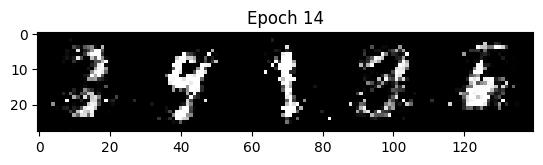

Epoch [15/20] Batch 0/469 Loss D: 0.7406, Loss G: 2.0411, D(x): 0.7828, D(G(z)): 0.1298
Epoch [15/20] Batch 200/469 Loss D: 0.7554, Loss G: 1.7860, D(x): 0.6387, D(G(z)): 0.1819
Epoch [15/20] Batch 400/469 Loss D: 0.6918, Loss G: 2.4397, D(x): 0.7309, D(G(z)): 0.0896


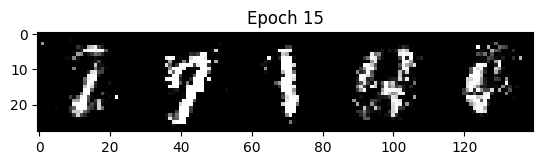

Epoch [16/20] Batch 0/469 Loss D: 1.2802, Loss G: 1.0795, D(x): 0.4493, D(G(z)): 0.3506
Epoch [16/20] Batch 200/469 Loss D: 0.7905, Loss G: 1.9954, D(x): 0.7139, D(G(z)): 0.1507
Epoch [16/20] Batch 400/469 Loss D: 0.8215, Loss G: 1.5358, D(x): 0.6212, D(G(z)): 0.2361


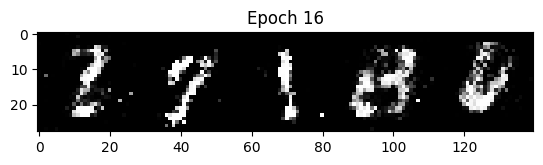

Epoch [17/20] Batch 0/469 Loss D: 0.9270, Loss G: 1.5714, D(x): 0.6500, D(G(z)): 0.2167
Epoch [17/20] Batch 200/469 Loss D: 1.1636, Loss G: 3.1451, D(x): 0.8435, D(G(z)): 0.0471
Epoch [17/20] Batch 400/469 Loss D: 0.9106, Loss G: 1.3359, D(x): 0.5664, D(G(z)): 0.2707


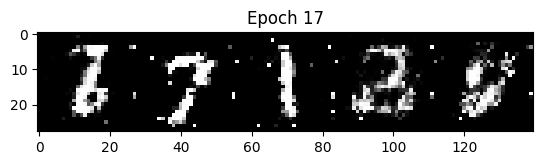

Epoch [18/20] Batch 0/469 Loss D: 0.9281, Loss G: 1.5982, D(x): 0.6836, D(G(z)): 0.2052
Epoch [18/20] Batch 200/469 Loss D: 0.9149, Loss G: 1.9024, D(x): 0.7028, D(G(z)): 0.1552
Epoch [18/20] Batch 400/469 Loss D: 1.0369, Loss G: 1.0566, D(x): 0.5047, D(G(z)): 0.3528


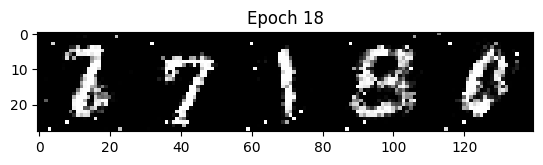

Epoch [19/20] Batch 0/469 Loss D: 0.8339, Loss G: 1.3891, D(x): 0.6067, D(G(z)): 0.2466
Epoch [19/20] Batch 200/469 Loss D: 1.0798, Loss G: 1.4160, D(x): 0.6234, D(G(z)): 0.2485
Epoch [19/20] Batch 400/469 Loss D: 0.9610, Loss G: 1.4693, D(x): 0.5916, D(G(z)): 0.2260


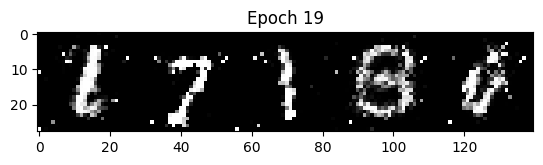

Epoch [20/20] Batch 0/469 Loss D: 0.9490, Loss G: 1.1478, D(x): 0.6155, D(G(z)): 0.3202
Epoch [20/20] Batch 200/469 Loss D: 0.8262, Loss G: 1.9396, D(x): 0.7016, D(G(z)): 0.1519
Epoch [20/20] Batch 400/469 Loss D: 1.1890, Loss G: 1.9426, D(x): 0.7142, D(G(z)): 0.1582


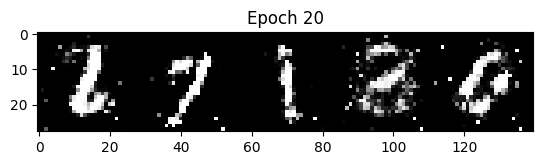

In [20]:
epochs = 20
losses_G = [] # List of avg values per epoch
losses_D = [] 

for epoch in range(epochs):
    epoch_losses_G = []
    epoch_losses_D = []
    for batch_idx, (real_imgs, _) in enumerate(trainloader):
        real_imgs = real_imgs.view(-1, 784).to(device)
        batch_size_curr = real_imgs.size(0)

        # Labels
        # real_labels = torch.ones(batch_size_curr, 1, device=device)
        real_labels = torch.full((batch_size_curr, 1), 0.9, device=device)
        fake_labels = torch.zeros(batch_size_curr, 1, device=device)

        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)

        D_real = Disc(real_imgs)
        D_fake = Disc(fake_imgs.detach())

        loss_D_real = criterion(D_real, real_labels)
        loss_D_fake = criterion(D_fake, fake_labels)
        loss_D = loss_D_real + loss_D_fake

        optim_d.zero_grad()
        loss_D.backward()
        optim_d.step()



        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)
        D_fake = Disc(fake_imgs)

        loss_G = criterion(D_fake, real_labels)

        optim_g.zero_grad()
        loss_G.backward()
        optim_g.step()

        if batch_idx % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {batch_idx}/{len(trainloader)} "
                  f"Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}, "
                  f"D(x): {D_real.mean().item():.4f}, D(G(z)): {D_fake.mean().item():.4f}")
        epoch_losses_D.append(loss_D.item())
        epoch_losses_G.append(loss_G.item())

    losses_D.append(np.mean(np.array(epoch_losses_D)))
    losses_G.append(np.mean(np.array(epoch_losses_G)))

    with torch.no_grad():
        fake_samples = Gen(fixed_noise).view(-1, 1, 28, 28)
        grid = torch.cat([fake_samples[i] for i in range(5)], dim=2)
        plt.imshow(grid.squeeze().cpu().numpy(), cmap="gray")
        plt.title(f"Epoch {epoch+1}")
        plt.show()

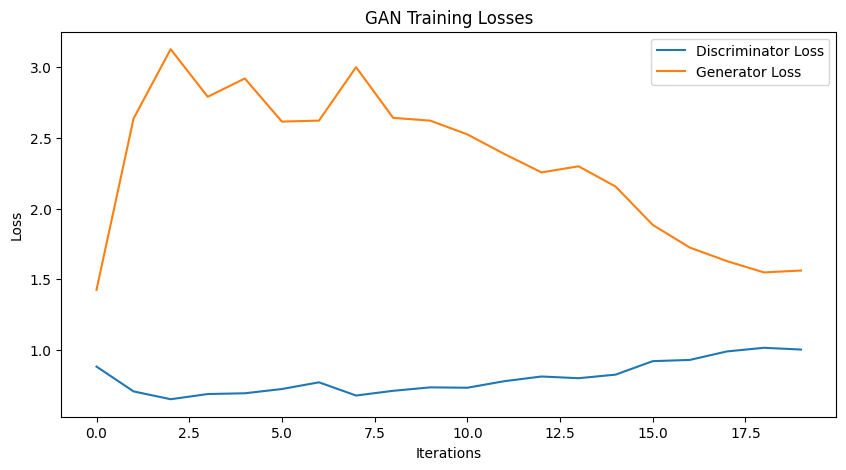

In [21]:
plt.figure(figsize=(10,5))
plt.plot(losses_D, label="Discriminator Loss")
plt.plot(losses_G, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GAN Training Losses")
plt.legend()
plt.show()

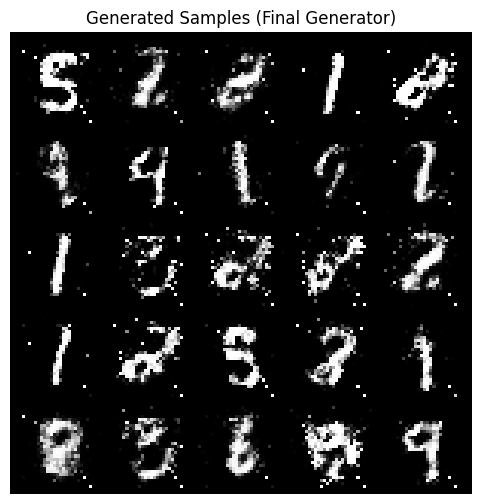

In [22]:
import torchvision.utils as vutils

z = torch.randn(25, 100, device=device)
with torch.no_grad():
    fake_imgs = Gen(z).view(-1, 1, 28, 28)

grid = vutils.make_grid(fake_imgs, nrow=5, normalize=True, value_range=(-1, 1))

plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.axis("off")
plt.title("Generated Samples (Final Generator)")
plt.show()
